## Observations and Insights 

1)The correlation between mouse weight, and average tumor volume is 0.84. It is a strong positive correlation, when the mouse weight increases the average tumor volume also increases.

2)The bar graph shows that the drug regimen Capomulin was tested on the maximum number of mice (230), followed by Ramicane (228).

3)The male and female mice population was very close- 125 male, and 124 female mice in the study. This shows a balanced gender population.

4)From statistics table and box plot, we can infer that Capomulin and Ramicane treatments were more effective than the other drugs.


In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress
from matplotlib.pyplot import figure
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Display the data table for preview
mouse_study_combined = pd.merge(mouse_metadata, study_results, how = "inner", on = "Mouse ID")
mouse_study_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count = mouse_study_combined['Mouse ID'].count()
mouse_count

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_combined[mouse_study_combined.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mice = mouse_study_combined[mouse_study_combined.duplicated(['Mouse ID'])]
all_duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study_combined.drop_duplicates('Mouse ID')
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df['Mouse ID'].count()
clean_mice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = mouse_study_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = mouse_study_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = mouse_study_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = mouse_study_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = mouse_study_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stats = pd.DataFrame({'Mean': mean,
                              'Median': median,
                              'Variance': variance,
                              'Standard Deviation': standard_dv,
                              'SEM': sem
                             })
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
single_group_by = mouse_study_combined.groupby('Drug Regimen')
summary_stats_two = single_group_by.agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']
summary_stats_two

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

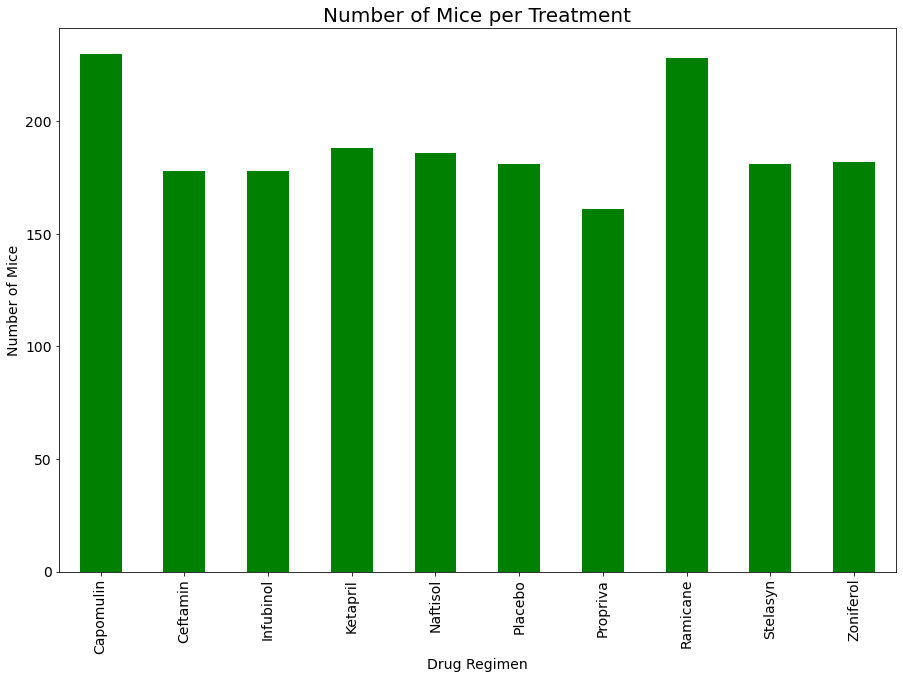

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_count_per_treatment = mouse_study_combined.groupby(['Drug Regimen']).count()['Mouse ID']

plot_pandas = mice_count_per_treatment.plot.bar(figsize = (15,10), color = 'g', fontsize = 14)
mice_count_per_treatment
plt.xlabel('Drug Regimen', fontsize = 14)
plt.ylabel('Number of Mice', fontsize = 14)
plt.title('Number of Mice per Treatment', fontsize = 20)

plt.show()

mice_count_per_treatment

Text(0, 0.5, 'Number of Mice')

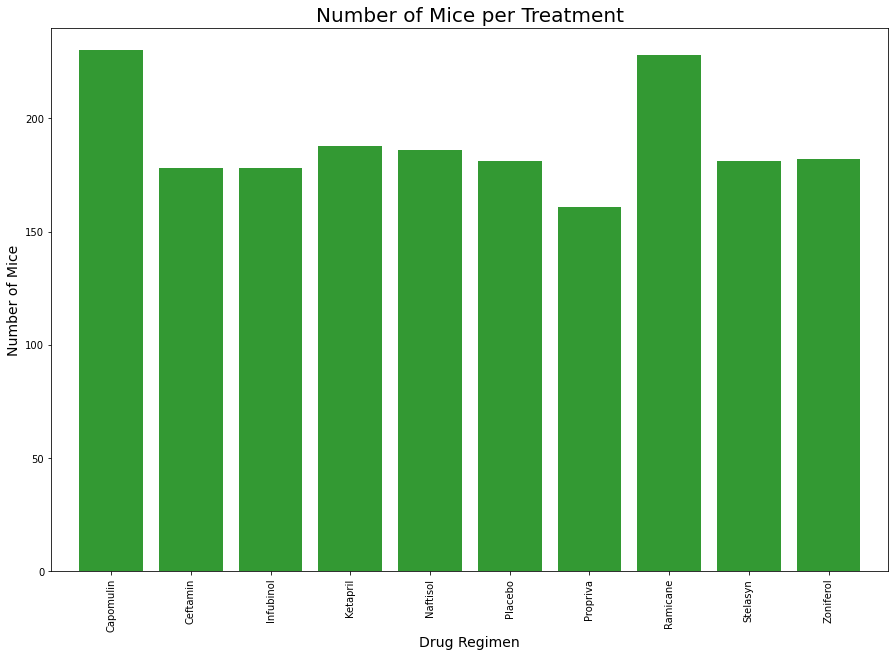

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mice_list = (mouse_study_combined.groupby(['Drug Regimen'])['Mouse ID'].count()).tolist()

x_axis = np.arange(len(mice_count_per_treatment))
fig1, ax1 = plt.subplots(figsize = (15,10))
plt.bar(x_axis, mice_list, color = 'g', alpha =0.8, align = 'center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin',
                            'Ceftamin',
                            'Infubinol',
                            'Ketapril',
                            'Naftisol',
                            'Placebo',
                            'Propriva',
                            'Ramicane',
                            'Stelasyn',
                            'Zoniferol'], rotation = 'vertical')

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mice_list) + 10)

plt.title('Number of Mice per Treatment', fontsize = 20)
plt.xlabel('Drug Regimen', fontsize = 14)
plt.ylabel('Number of Mice', fontsize = 14)

In [11]:
gender_groupby = mouse_study_combined.groupby(["Mouse ID","Sex"])
gender_groupby
gender_df = pd.DataFrame(gender_groupby.size())

mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

mouse_gender                                    

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


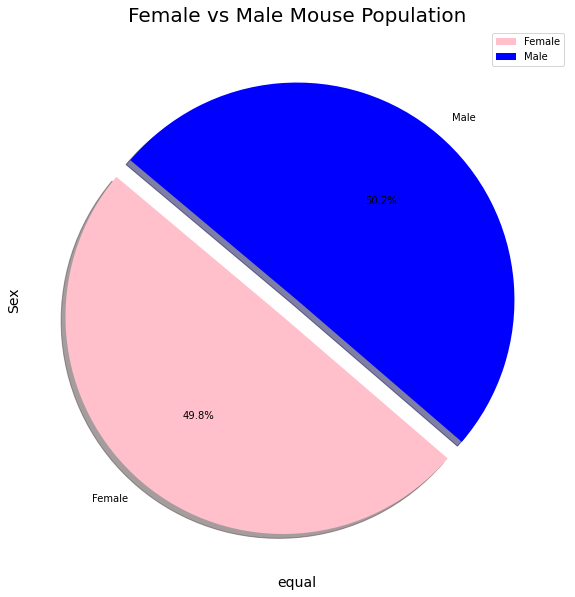

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
colors = ['pink', 'blue']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y ='Total Count',
                             figsize = (15,10),
                             colors = colors,
                             startangle = 140,
                             explode = explode,
                             shadow = True,
                             autopct = "%1.1f%%")

plt.title('Female vs Male Mouse Population', fontsize = 20)
plt.ylabel('Sex', fontsize = 14)
plt.xlabel('equal', fontsize = 14)

plt.show()

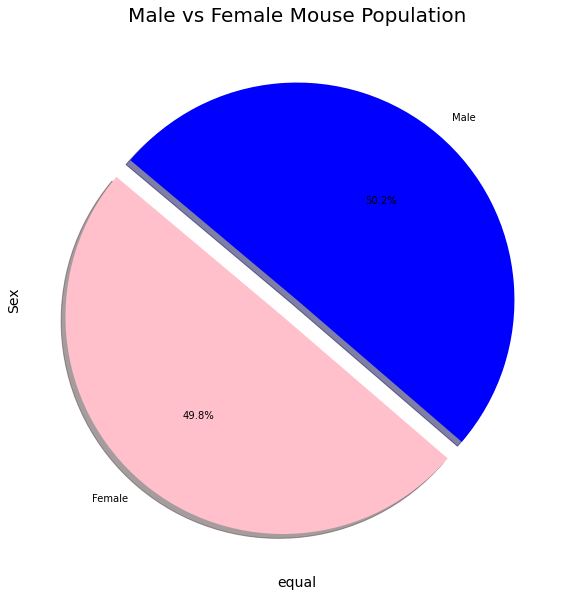

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.799197, 50.200803]
colors = ['pink', 'blue']
explode = (0.1, 0)

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(sizes,
        explode=explode,
        labels=labels,
        colors=colors,
        autopct="%1.1f%%",
        shadow=True,
        startangle=140,)
plt.title('Male vs Female Mouse Population', fontsize = 20)
plt.ylabel('Sex', fontsize = 14)
plt.xlabel("equal", fontsize = 14)

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_study_combined.groupby(['Mouse ID'])['Timepoint'].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data_lasttp = last_timepoint.merge(mouse_study_combined, on =['Mouse ID', 'Timepoint'], how = 'left')
merged_data_lasttp

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [15]:
 # Put treatments into a list for for loop (and later for plot labels)
drugs_of_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
total_tumor_volume = []
    
counter = 0


# Do quartile calculations for each drug
for drug in drugs_of_interest:
    tumor_volume = merged_data_lasttp.loc[merged_data_lasttp["Drug Regimen"]== drug, "Tumor Volume (mm3)"]
    # add subset
    total_tumor_volume.append(tumor_volume)    
    quarters  =  tumor_volume.quantile([.25,.5,.75]).round(2)
    lower_quarter  =  quarters[0.25].round(2)
    upper_quarter  =  quarters[0.75].round(2)
    iqr  =  round(upper_quarter-lower_quarter,2)
    lower_bound  =  round(lower_quarter - (1.5*iqr),2)
    upper_bound  =  round(upper_quarter + (1.5*iqr),2)
    
    # print an escape line for each new loop
    if counter == 0:
        print(f'\n')
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lower_quarter}")
    print(f"The upper quartile of {drug} is: {upper_quarter}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quarters[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f'\n')
    counter += 1     



Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.13 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.


Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.


Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.17 
Values below 36.83 for Infubinol could be outliers.
Values above 82.75 for Infubinol could be outliers.


Ceftamin IQR data is:
The lower quartile of Ceftamin is: 48.72
The upper quartile of Ceftamin is: 64.3
The inte

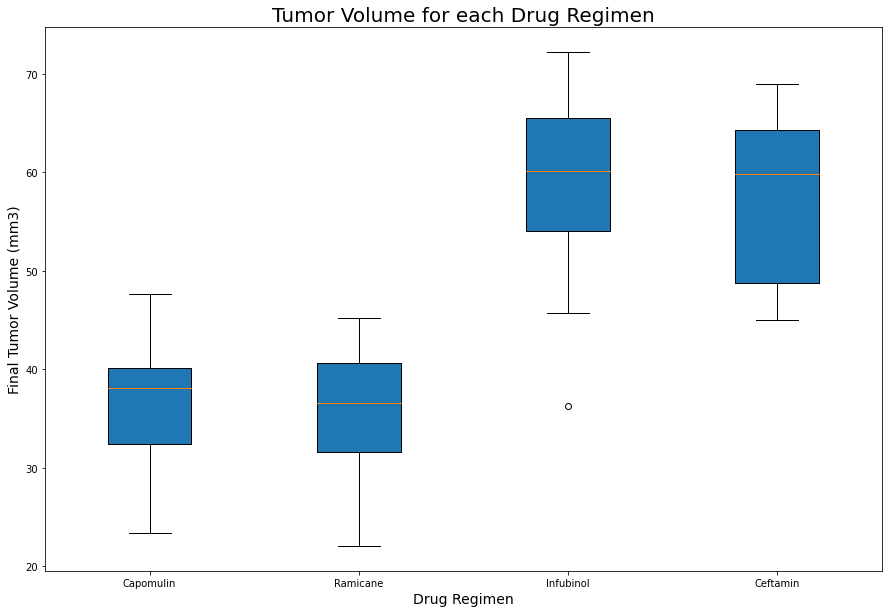

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.set_title('Tumor Volume for each Drug Regimen',fontsize =20)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(total_tumor_volume, labels=drugs_of_interest, widths = 0.4, patch_artist=True,vert=True)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

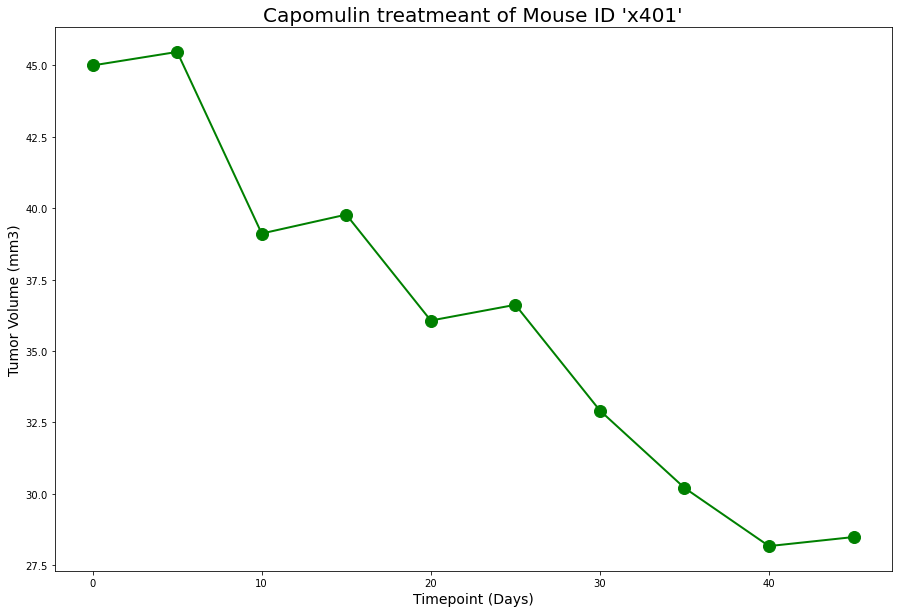

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = mouse_study_combined.loc[mouse_study_combined["Drug Regimen"] == "Capomulin",:]
capomulin


mouse_in_capomulin = capomulin.loc[capomulin["Mouse ID"] == "x401",:]
mouse_in_capomulin

# Specify plot parameters
x_axis = mouse_in_capomulin["Timepoint"]
tumor_volume = mouse_in_capomulin["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title("Capomulin treatmeant of Mouse ID 'x401'",fontsize =20)
plt.plot(x_axis, tumor_volume,linewidth=2, markersize=12,marker="o",color="green", label="mm3")
plt.xlabel("Timepoint (Days)",fontsize =14)
plt.ylabel("Tumor Volume (mm3)",fontsize =14)


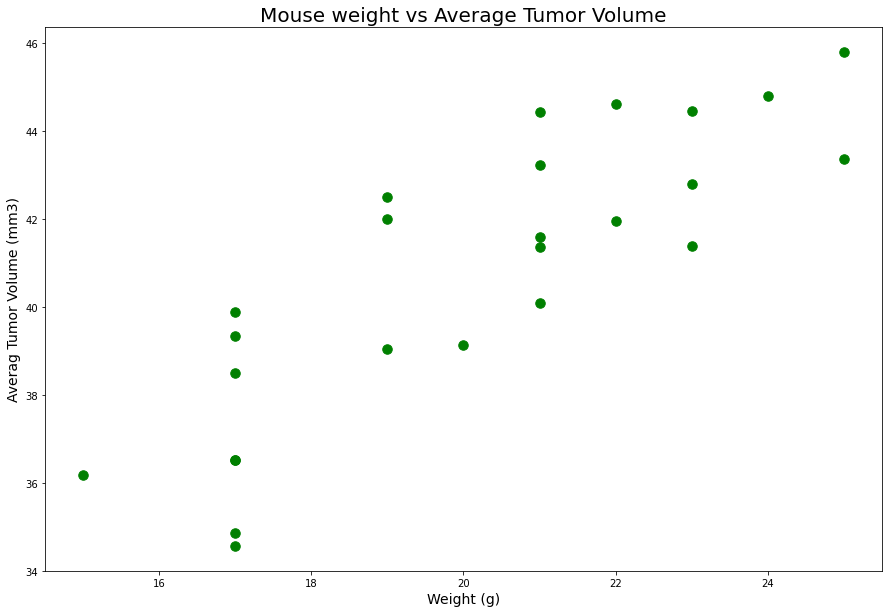

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avgerage_capomulin = capomulin.groupby(['Mouse ID']).mean()
fig1, ax1 = plt.subplots(figsize=(15, 10))
marker_size=14
plt.scatter(avgerage_capomulin['Weight (g)'],avgerage_capomulin['Tumor Volume (mm3)'],s=90, color='green')
plt.title('Mouse weight vs Average Tumor Volume',fontsize =20)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =14)

plt.show()

avgerage_capomulin.head()

## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(avgerage_capomulin['Weight (g)'],avgerage_capomulin['Tumor Volume (mm3)'])[0],2)
print(f'The correlation between mouse weight and average tumor volume is: {correlation}')

x_values = avgerage_capomulin['Weight (g)']
y_values = avgerage_capomulin['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{correlation}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

The correlation between mouse weight and average tumor volume is: 0.84
slope:0.9544396890241045
intercept:21.552160532685015
rvalue (Correlation coefficient):0.8419363424694718
pandas (Correlation coefficient):0.84
stderr:0.12754359033201337
y = 0.95x + 21.55


The r-squared is: 0.7088568047708717


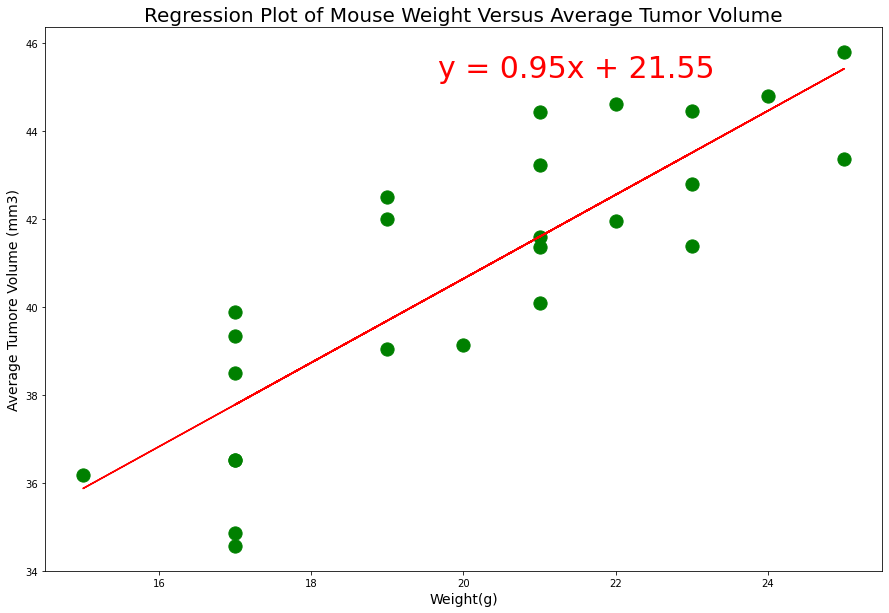

In [27]:
# Add the linear regression equation and line to the scatter plot
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=175, color='green')
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot of Mouse Weight Versus Average Tumor Volume',fontsize =20)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =14)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")